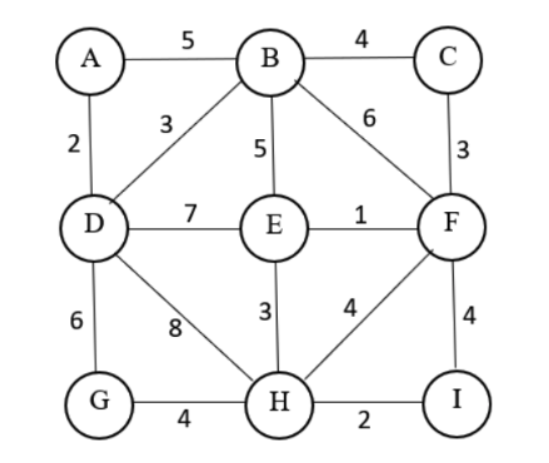

In [ ]:
class Graph:
     def __init__(self, adj_dic={}):
          self.adj_dic = adj_dic

     def child(self, parent):
          return self.adj_dic[parent]

     def vertices(self):
          return list(self.adj_dic)

     def Edges(self):
          edges = {(i, j): self.adj_dic[i][j] for i in self.vertices() for j in self.child(i)}
          return edges

     def PathWeight(self, u, v):
          return self.adj_dic[u][v]

     def addVertices(self, *v):
          for i in v:
               self.adj_dic[i] = {}
     def addEdges(self, d={}):# addEdges({("A", "B"):2})
          for i in d:
               if i[0] not in self.adj_dic:
                    self.adj_dic[i[0]] = {i[1]:d[i]}
                    self.adj_dic[i[1]][i[0]] = d[i]
               elif i[1] not in self.adj_dic:
                    self.adj_dic[i[1]] = {i[0]:d[i]}
                    self.adj_dic[i[0]][i[1]] = d[i]
               else:
                    self.adj_dic[i[1]][i[0]] = d[i]
                    self.adj_dic[i[0]][i[1]] = d[i]
     def __str__(self):
          return str(self.adj_dic).replace("}, ", "}\n")[1:-1].replace("'", "")


In [ ]:
dic = {
     'A': {'B': 5, 'D': 2},
     'B': {'A': 5, 'C': 4, 'D': 3, 'E': 5, 'F': 6},
     'C': {'B': 4, 'F': 3},
     'D': {'A': 2, 'B': 3, 'E': 7, 'G': 6},
     'E': {'B': 5, 'D': 7, 'F': 1, 'H': 3},
     'F': {'B': 6, 'C': 3, 'E': 1, 'H': 4, 'I': 4},
     'G': {'D': 6, 'H': 4},
     'H': {'D': 8, 'E': 3, 'F': 4, 'G': 4, 'I': 2},
     'I': {'F': 4, 'H': 2}
}

graph = Graph(dic)

prims algortithm


In [9]:
def Prims(graph, source):
     spanTree = Graph()
     spanTree.addVertices(source)
     Leafs = [source]
     Edges = []
     pathCost = 0
     while spanTree.vertices()!=graph.vertices():
          availPaths = []
          for i in Leafs:
               children = graph.child(i)
               for j in children:
                    if j in Leafs:
                         continue
                    if {i, j} not in availPaths:
                         availPaths.append({i, j})
          paths = {tuple(i): graph.PathWeight(tuple(i)[0], tuple(i)[1]) for i in availPaths}
          if paths == {}:
               break
          minPath = min(paths, key=lambda k: paths[k])
          if minPath[0] in Leafs:
               Leafs.append(minPath[1])
          else:
               Leafs.append(minPath[0])
          Edges.append(minPath)
          spanTree.addEdges({minPath:paths[minPath]})
          pathCost+=paths[minPath]
     print(spanTree)
     print(f"Path Cost : {pathCost}")
     return spanTree, pathCost

kruskals algorithm


In [11]:
graph = {
     'A': [('B', 5), ('D', 2)],
     'B': [('A', 5), ('C', 4), ('D', 3), ('E', 5), ('F', 6)],
     'C': [('B', 4), ('F', 3)],
     'D': [('A', 2), ('B', 3), ('E', 7), ('G', 6)],
     'E': [('B', 5), ('D', 7), ('F', 1), ('H', 3)],
     'F': [('B', 6), ('C', 3), ('E', 1), ('H', 4), ('I', 4)],
     'G': [('D', 6), ('H', 4)],
     'H': [('D', 8), ('E', 3), ('F', 4), ('G', 4), ('I', 2)],
     'I': [('F', 4), ('H', 2)]
}

In [12]:
prims = prim(graph)
print("Minimum Spanning Tree:")
for edge in prims:
    print(f"{edge[0]} - {edge[1]}: {edge[2]}")

Minimum Spanning Tree:
A - D: 2
D - B: 3
B - C: 4
C - F: 3
F - E: 1
E - H: 3
H - I: 2
H - G: 4
